<a href="https://colab.research.google.com/github/sumantsharma16/machine-learning/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dependencies

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt

# Data collection and processing

In [3]:
# loading the data from csv file to pandas data frame
car_dataset = pd.read_csv('/content/car data.csv')

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.shape

(301, 9)

In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical data

In [17]:
# encoding the fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':1, 'Diesel':2, 'CNG':3}}, inplace=True)

In [18]:
# encoding the Seller type
car_dataset.replace({'Seller_Type':{'Dealer':1, 'Individual':2}}, inplace = True)

In [19]:
# encoding the Transmission
car_dataset.replace({'Transmission':{'Manual':1, 'Automatic':2}}, inplace = True)

In [20]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0


In [21]:
# splitting the data and target
x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [22]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            1             1   
1    2013           9.54       43000          2            1             1   
2    2017           9.85        6900          1            1             1   
3    2011           4.15        5200          1            1             1   
4    2014           6.87       42450          2            1             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          2            1             1   
297  2015           5.90       60000          1            1             1   
298  2009          11.00       87934          1            1             1   
299  2017          12.50        9000          2            1             1   
300  2016           5.90        5464          1            1             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [23]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [24]:
# splitting training and test data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [26]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [27]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [28]:
# prediction on trianing data
training_data_predicition = lin_reg_model.predict(x_train)

In [31]:
# R Squared error
error_score = metrics.r2_score(y_train, training_data_predicition)
print('R squared error:', error_score)

R squared error: 0.8799451660493707


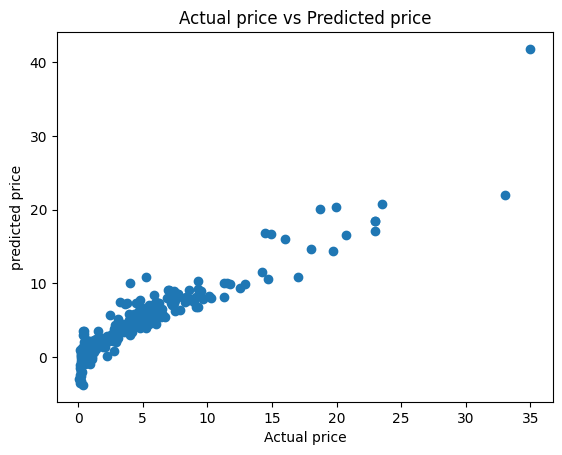

In [35]:
# Visualize the actual price and predicted price

plt.scatter(y_train, training_data_predicition)
plt.xlabel('Actual price')
plt.ylabel('predicted price')
plt.title("Actual price vs Predicted price")
plt.show()

In [36]:
# prediction on testing data
test_data_prediction = lin_reg_model.predict(x_test)

In [37]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared Error:', error_score)

R squared Error: 0.8365766715027055


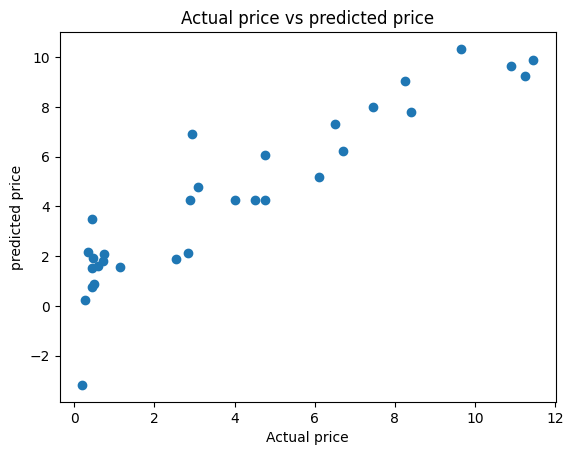

In [39]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('predicted price')
plt.title('Actual price vs predicted price')
plt.show()

lasso regression

In [40]:
# loading the linear regressin model
lass_reg_model = Lasso()

In [41]:
lass_reg_model = Lasso()

In [42]:
lass_reg_model.fit(x_train , y_train)

Lasso()

model evaluation

In [43]:
# prediction on trianing data
training_data_predicition = lass_reg_model.predict(x_train)

In [45]:
# R squared erro
error_score  = metrics.r2_score(y_train, training_data_predicition)
print('R squared error:', error_score)

R squared error: 0.8427856123435794


visualizing actual and predicted price

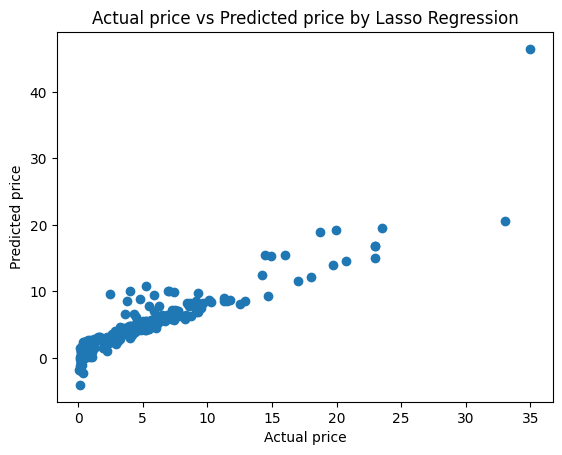

In [46]:
plt.scatter(y_train, training_data_predicition)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price by Lasso Regression')
plt.show()

In [48]:
# prediction on training data
test_data_prediction = lass_reg_model.predict(x_test)

In [51]:
# R squred error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error", error_score)

R squared error 0.8709167941173195


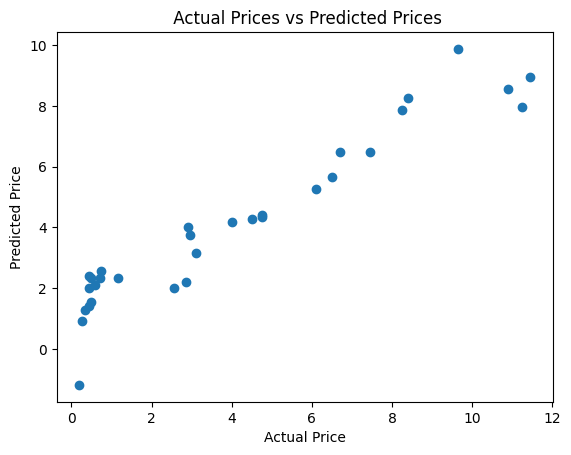

In [52]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()